# Libraries

In [39]:
import requests
import bs4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()

import nltk
from nltk.corpus import wordnet as wn 

In [1]:
import os

In [2]:
cwd = os.getcwd()
cwd

'/Users/dibyendumandal/Google Drive/DIBYENDU/JOB_DataIncubator/Project_Indian_Middle_eastern_and_French'

In [3]:
os.listdir(cwd)

['.ipynb_checkpoints',
 'ME_recipes_details.csv',
 'ME_recipes_with_detail.txt',
 'middle_eastern_recipes_urls.txt',
 'test.db',
 'workspace_large.ipynb',
 'workspace_small_Indian.ipynb',
 'workspace_small_me.ipynb']

# Wrangling

## 1. Gather

### Strategy 

I. Get all URLs, store them in a list

II. For each URL, get
1. name
2. ingredients
3. URL

and then create a dictionary

III. Save the dictionaries in a list

IV. Convert into a dataframe

### I. Get all URLs, store them in a list

In [4]:
NUM_PAGES_INDIA = 39
base_url_India = "https://www.allrecipes.com/recipes/233/" + \
                 "world-cuisine/asian/indian/?page="

In [6]:
def recipe_urls_in_a_page(url):
    """Given an webpage url returns a list of 
    recipe urls in the webpage
    (CAUTION: Applies to allrecipes.com only)"""
    
    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    elems = soup.find_all('article', class_ = "fixed-recipe-card")
    recipe_urls = [elem.find_all('a')[0].get('href') for elem in elems]
    return recipe_urls

In [9]:
import requests
import bs4

In [10]:
recipe_urls_in_a_page(base_url_India+"1")

['https://www.allrecipes.com/recipe/85469/indian-chapati-bread/',
 'https://www.allrecipes.com/recipe/231026/keema-aloo-ground-beef-and-potatoes/',
 'https://www.allrecipes.com/recipe/247233/roti-canaiparatha-indian-pancake/',
 'https://www.allrecipes.com/recipe/246179/black-chana-with-potato/',
 'https://www.allrecipes.com/recipe/256599/tomato-cucumber-kachumbar/',
 'https://www.allrecipes.com/recipe/247204/red-split-lentils-masoor-dal/',
 'https://www.allrecipes.com/recipe/34591/coconut-chutney/',
 'https://www.allrecipes.com/recipe/245131/tamarind-sauce-fish-curry/',
 'https://www.allrecipes.com/recipe/220560/kashmiri-lamb/',
 'https://www.allrecipes.com/recipe/45736/chicken-tikka-masala/',
 'https://www.allrecipes.com/recipe/14565/naan/',
 'https://www.allrecipes.com/recipe/13087/mulligatawny-soup-i/',
 'https://www.allrecipes.com/recipe/228293/curry-stand-chicken-tikka-masala-sauce/',
 'https://www.allrecipes.com/recipe/60598/vegetarian-korma/',
 'https://www.allrecipes.com/recipe

In [12]:
from time import sleep

In [13]:
recipe_urls_India = []
for page_num in range(1, NUM_PAGES_INDIA + 1):
    print('Souping page number', page_num, ', ', 
          len(recipe_urls_India), ' found so far')
    url = base_url_India + str(page_num)
    recipe_urls_India.extend(recipe_urls_in_a_page(url))
    sleep(15)

Souping page number 1 ,  0  found so far
Souping page number 2 ,  29  found so far
Souping page number 3 ,  49  found so far
Souping page number 4 ,  69  found so far
Souping page number 5 ,  89  found so far
Souping page number 6 ,  109  found so far
Souping page number 7 ,  129  found so far
Souping page number 8 ,  149  found so far
Souping page number 9 ,  169  found so far
Souping page number 10 ,  189  found so far
Souping page number 11 ,  209  found so far
Souping page number 12 ,  229  found so far
Souping page number 13 ,  249  found so far
Souping page number 14 ,  269  found so far
Souping page number 15 ,  289  found so far
Souping page number 16 ,  309  found so far
Souping page number 17 ,  329  found so far
Souping page number 18 ,  349  found so far
Souping page number 19 ,  369  found so far
Souping page number 20 ,  389  found so far
Souping page number 21 ,  409  found so far
Souping page number 22 ,  429  found so far
Souping page number 23 ,  449  found so far
Sou

In [40]:
recipe_urls_India[:10]

['https://www.allrecipes.com/recipe/85469/indian-chapati-bread/',
 'https://www.allrecipes.com/recipe/231026/keema-aloo-ground-beef-and-potatoes/',
 'https://www.allrecipes.com/recipe/247233/roti-canaiparatha-indian-pancake/',
 'https://www.allrecipes.com/recipe/246179/black-chana-with-potato/',
 'https://www.allrecipes.com/recipe/256599/tomato-cucumber-kachumbar/',
 'https://www.allrecipes.com/recipe/247204/red-split-lentils-masoor-dal/',
 'https://www.allrecipes.com/recipe/34591/coconut-chutney/',
 'https://www.allrecipes.com/recipe/245131/tamarind-sauce-fish-curry/',
 'https://www.allrecipes.com/recipe/220560/kashmiri-lamb/',
 'https://www.allrecipes.com/recipe/45736/chicken-tikka-masala/']

#### Write URLs

In [15]:
f = open('Indian_recipes_urls.txt', 'w')
for url in recipe_urls_India:
    f.write(url+'\n')
f.close()

#### Read URLs

In [17]:
f = open('Indian_recipes_urls.txt')
for i, line in enumerate(f):
    print(line.rstrip())
    if i>9: break
f.close()

https://www.allrecipes.com/recipe/85469/indian-chapati-bread/
https://www.allrecipes.com/recipe/231026/keema-aloo-ground-beef-and-potatoes/
https://www.allrecipes.com/recipe/247233/roti-canaiparatha-indian-pancake/
https://www.allrecipes.com/recipe/246179/black-chana-with-potato/
https://www.allrecipes.com/recipe/256599/tomato-cucumber-kachumbar/
https://www.allrecipes.com/recipe/247204/red-split-lentils-masoor-dal/
https://www.allrecipes.com/recipe/34591/coconut-chutney/
https://www.allrecipes.com/recipe/245131/tamarind-sauce-fish-curry/
https://www.allrecipes.com/recipe/220560/kashmiri-lamb/
https://www.allrecipes.com/recipe/45736/chicken-tikka-masala/
https://www.allrecipes.com/recipe/14565/naan/


### II. For each URL, get
1. name
2. ingredients
3. url

Create a dictionary

III. Save the dictionaries in a list ###

#### Details from a given URL

In [30]:
def recipe_details(url):
    """Given a url of a recipe returns a list of ingredients
    (CAUTION: Applies to allrecipes.com only)"""    
    
    recipe = {}
    name = ' '.join(url.split('/')[-2].split('-')).title()
    ingredients = []
    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    lines = soup.find_all('li', class_= "checkList__line")[:-4]
    for line in lines:
        item = line.find('label').get('title').split(" ")
        ingredients.extend(item)
        
    ingredients_string = " ".join(ingredients)
                          
    return {
        "name": name,
        "ingredients_string": ingredients_string,
        "url": url}

#### Load the list of URLs

In [31]:
recipes = []
f = open('Indian_recipes_urls.txt')
for line in f:
    recipes+= [line.rstrip()]
    
recipes[:10]

['https://www.allrecipes.com/recipe/85469/indian-chapati-bread/',
 'https://www.allrecipes.com/recipe/231026/keema-aloo-ground-beef-and-potatoes/',
 'https://www.allrecipes.com/recipe/247233/roti-canaiparatha-indian-pancake/',
 'https://www.allrecipes.com/recipe/246179/black-chana-with-potato/',
 'https://www.allrecipes.com/recipe/256599/tomato-cucumber-kachumbar/',
 'https://www.allrecipes.com/recipe/247204/red-split-lentils-masoor-dal/',
 'https://www.allrecipes.com/recipe/34591/coconut-chutney/',
 'https://www.allrecipes.com/recipe/245131/tamarind-sauce-fish-curry/',
 'https://www.allrecipes.com/recipe/220560/kashmiri-lamb/',
 'https://www.allrecipes.com/recipe/45736/chicken-tikka-masala/']

In [41]:
recipes[:10]

['https://www.allrecipes.com/recipe/85469/indian-chapati-bread/',
 'https://www.allrecipes.com/recipe/231026/keema-aloo-ground-beef-and-potatoes/',
 'https://www.allrecipes.com/recipe/247233/roti-canaiparatha-indian-pancake/',
 'https://www.allrecipes.com/recipe/246179/black-chana-with-potato/',
 'https://www.allrecipes.com/recipe/256599/tomato-cucumber-kachumbar/',
 'https://www.allrecipes.com/recipe/247204/red-split-lentils-masoor-dal/',
 'https://www.allrecipes.com/recipe/34591/coconut-chutney/',
 'https://www.allrecipes.com/recipe/245131/tamarind-sauce-fish-curry/',
 'https://www.allrecipes.com/recipe/220560/kashmiri-lamb/',
 'https://www.allrecipes.com/recipe/45736/chicken-tikka-masala/']

In [32]:
import timeit

In [33]:
import datetime

In [34]:
print("Time: {}".format(datetime.datetime.now()))

Time: 2018-08-06 01:46:17.894213


#### Downloads deatils from all the urls

In [36]:
recipes_in_detail = []
for i, url in enumerate(recipes):
    if i%10 == 0:
        print('Time = {}, souping page {}'
              .format(datetime.datetime.now(), i))
    recipes_in_detail += [recipe_details(url)]
    sleep(10)
    # if i > 10: break
    
#recipes_in_detail

Time = 2018-08-06 01:50:42.392225, souping page 0
Time = 2018-08-06 01:52:25.163461, souping page 10
Time = 2018-08-06 01:54:08.194252, souping page 20
Time = 2018-08-06 01:55:51.859880, souping page 30
Time = 2018-08-06 01:57:35.089056, souping page 40
Time = 2018-08-06 01:59:18.386561, souping page 50
Time = 2018-08-06 02:01:01.464647, souping page 60
Time = 2018-08-06 02:02:44.645787, souping page 70
Time = 2018-08-06 02:04:27.742700, souping page 80
Time = 2018-08-06 02:06:11.420959, souping page 90
Time = 2018-08-06 02:07:54.927314, souping page 100
Time = 2018-08-06 02:09:37.922758, souping page 110
Time = 2018-08-06 02:11:20.944784, souping page 120
Time = 2018-08-06 02:13:04.040173, souping page 130
Time = 2018-08-06 02:14:47.134551, souping page 140
Time = 2018-08-06 02:16:30.123120, souping page 150
Time = 2018-08-06 02:18:13.174539, souping page 160
Time = 2018-08-06 02:19:56.232189, souping page 170
Time = 2018-08-06 02:21:39.437840, souping page 180
Time = 2018-08-06 02:23

In [111]:
recipes_in_detail[np.random.randint(low=0, high=len(recipes_in_detail)+1)]

{'name': 'Mummys Ginger Soup',
 'ingredients_string': '3 tablespoons butter 2 tablespoons vegetable oil 2 tablespoons minced fresh ginger root 1 tablespoon all-purpose flour 1/2 teaspoon ground turmeric black pepper to taste 2 cups water 2 cups whole milk',
 'url': 'https://www.allrecipes.com/recipe/158948/mummys-ginger-soup/'}

In [110]:
recipes_in_detail[np.random.randint(low=0, high=len(recipes_in_detail)+1)]

{'name': 'Easy Curried Cauliflower',
 'ingredients_string': '3 cups grated cauliflower 3 tablespoons vegetable oil 1/2 large onion, diced 2 cloves garlic 1 teaspoon cumin seeds 1 tomato, diced 1/2 teaspoon cayenne pepper 1 teaspoon salt, or to taste 1 teaspoon ground dried turmeric 2 teaspoons ground coriander seed 1 (12 ounce) can kidney beans, drained and rinsed',
 'url': 'https://www.allrecipes.com/recipe/160185/easy-curried-cauliflower/'}

In [43]:
df_recipes_in_detail = pd.DataFrame(recipes_in_detail)
df_recipes_in_detail.to_csv('Indian_recipes_details.csv', index=False)

In [44]:
df = pd.read_csv('Indian_recipes_details.csv')

In [45]:
df.sample()

,ingredients_string,name,url
738,2 cups water 1 cup thick buttermilk 1 cup chic...,Microwave Khandvi,https://www.allrecipes.com/recipe/256596/micro...


### Assess

In [51]:
def string_to_list_lowercase(string):
    return string.lower().split(" ")

In [68]:
string_to_list_lowercase("(Spectrum(R)")

['(spectrum(r)']

In [69]:
df['ingredients_list'] = df['ingredients_string'].apply(string_to_list_lowercase)
df.sample()

,ingredients_string,name,url,ingredients_list
101,2 cups water 1 tea bag 1 bay leaf 2 (15.5 ounc...,Cholay Curried Chickpeas,https://www.allrecipes.com/recipe/67767/cholay...,"[2, cups, water, 1, tea, bag, 1, bay, leaf, 2,..."


#### Unique ingredients

In [112]:
Indian_ingredients = set()
for i, ingredients in enumerate(df['ingredients_list']):
    Indian_ingredients = Indian_ingredients | set(ingredients)
    # if i > 3: break
    
len(Indian_ingredients)

1294

In [116]:
# Code help from https://stackoverflow.com/questions/40167612/
# how-to-keep-only-the-noun-words-in-a-wordlist-python-nltk
text=' '.join(Indian_ingredients)
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)

# ingredients should be nouns
Indian_ingredients = [word for word, pos in tags 
                      if (pos == 'NN' 
                      or pos == 'NNP' 
                      or pos == 'NNS' 
                      or pos == 'NNPS')]

len(Indian_ingredients)

734

In [117]:
Indian_ingredients = list(set(Indian_ingredients))
len(Indian_ingredients)

548

In [118]:
Indian_ingredients.sort()
Indian_ingredients[:10]

['%',
 '-inch',
 'ajwain',
 'allspice',
 'almond',
 'almonds',
 'amchoor',
 'amchur',
 'amount',
 'anapakaya']

In [119]:
f = open("Indian_ingredients.txt", 'w')
for item in Indian_ingredients:
    f.write(item + '\n')
    
f.close()

In [120]:
f = open("Indian_ingredients.txt")
for i, item in enumerate(f):
    print(item.rstrip())
    if i > 1: break
        
f.close()

%
-inch
ajwain


In [121]:
Indian_ingredients_inspected = []

In [123]:
f = open("Indian_ingredients.txt")
for item in f:
    Indian_ingredients_inspected.append(item.rstrip())
    

In [124]:
f.close()

In [126]:
len(Indian_ingredients_inspected)

263

In [129]:
plurals_s = ['almonds', 'apples', 'apricots', 'bananas', 'beans','beets', 
             'breads', 'capers', 'carrots', 'cashews','chickpeas', 'chiles', 
             'chilis', 'chives', 'cloves', 'cucumbers', 'currants', 'eggplants', 
             'eggs', 'giblets', 'gourds', 'grapes', 'husks', 'herbs', 'kiwis', 'lemons',
             'limes', 'lentils', 'mangoes','mushrooms', 'noodles', 'nuts', 'olives', 'onions', 
             'oranges', 'parsnips', 'peaches', 'peanuts', 'pears', 'peppercorns','peppers', 'pistachios', 
             'raisins', 'ribs', 'scallions', 'scallops', 'shallots', 'sprigs', 'sprouts', 'totillas',
             'turnips', 'walnuts', 'yams', 'yolks', 'zucchinis']

plurals_es = ['potatoes', 'radishes', 'tomatoes']

replace_dictionary = {"amchoor": "amchur",
                      "berries": "berry",
                      "channa": "chana",
                      "cherries": "cherry",
                      "chile": "chili",
                      "cranberries": "cranberry",
                      "daal": "lentil",
                      "dal": "lentil",
                      "dhania": "coriander",
                      "drumsticks": "chicken",
                      "elaichi": "cardamom",
                      "hen": "chicken",
                      "jeera": "cumin",
                      "lavang": "clove",
                      "maida": "flour",
                      "mangos": "mango",
                      "masoor": "lentil",
                      "matar": "pea",
                      "methi": "fenugreek",
                      "moong": "lentil",
                      "rajma": "bean",
                      "roma": "tomato",
                      "sago": 'tapioca',
                      "suji": "semolina",
                      "strawberries": "strawberry"
                      }

In [131]:
Indian_ingredients_inspected = [item[:-1] if item.endswith(',') else item for item in Indian_ingredients_inspected]
len(Indian_ingredients_inspected)

263

In [133]:
Indian_ingredients_inspected = [item[:-1] if item in plurals_s else item 
                                for item in Indian_ingredients_inspected]

len(Indian_ingredients_inspected)

263

In [134]:
Indian_ingredients_inspected = [item[:-1] if item in plurals_es else item 
                                for item in Indian_ingredients_inspected]

len(Indian_ingredients_inspected)

263

In [135]:
Indian_ingredients_inspected = [replace_dictionary[item] if item in replace_dictionary else item 
                                for item in Indian_ingredients_inspected]

len(Indian_ingredients_inspected)

263

In [137]:
Indian_ingredients_inspected = list(set(Indian_ingredients_inspected))
len(Indian_ingredients_inspected)

218

In [138]:
Indian_ingredients_inspected.sort()

In [139]:
f = open('Indian_ingredients_inspected.txt', 'w')
for item in Indian_ingredients_inspected:
    f.write(item + '\n')
    
f.close()

In [140]:
f = open('Indian_ingredients_inspected.txt')
print(f.read())
f.close()

ajwain
almond
amchur
anise
apple
apricot
arbol
asafoetida
asparagus
bacon
banana
barley
basmati
bay
bean
beef
beet
berry
besan
biryani
boar
bread
broccoli
brussels
butter
cabbage
calabash
cannellini
caper
cardamom
carnation
carp
carrot
cashew
cauliflower
cayenne
celery
chana
chard
cheese
cherry
chicken
chickpea
chili
chilies
chilli
chive
chocolate
chutney
cider
cilantro
cinnamon
clove
cocoa
coconut
cod
coffee
coriander
corn
cornstarch
cranberry
cream
crookneck
cucumber
cumin
curd
currant
dalchini
dates
dill
dukka
dunya
durum
egg
eggplant
fennel
fenugreek
fig
fish
fist
flour
garam
garbanzo
ghee
giblet
ginger
goat
gourd
grape
habanero
haddock
haldi
half-and-half
halibut
ham
heinz
hens
herb
honey
horseradish
husk
jackfruit
jaggery
jalapeno
kalamata
kale
ketchup
khus
kiwi
knorr
lamb
lemon
lemongrass
lentil
lettuce
lime
lipton
mace
madrasala
mango
mangoe
margarine
mayonnaise
meat
meatballs
milk
mint
mozzarella
mushroom
mustard
noodle
nut
nutmeg
oil
okra
olive
onion
orange
oregano
paneer
par

In [146]:
def ingredients_proper_Indian(ingredients):
    
    items = [item[:-1] if item.endswith(',') else item
             for item in ingredients]
    
    items = [item[:-1] if item in plurals_s else item
             for item in items] 
    
    items = [item[:-2] if item in plurals_es else item
             for item in items] 
    
    items = [replace_dictionary[item] if item in replace_dictionary else item
             for item in items]
    
    items = [item for item in items 
             if item in Indian_ingredients_inspected]
     
    items = list(set(items))
    items.sort()
    return items

In [145]:
def ingredients_proper_me(ingredients):
    
    items = [item[:-1] if item.endswith(',') else item
             for item in ingredients]
    
    items = [item for item in items 
             if item in me_ingredients_unique]
    
    items = [item[:-1] if item in plurals_s else item
             for item in items] 
    
    items = [item[:-2] if item in plurals_es else item
             for item in items] 
    
    items = [replace_dictionary[item] if item in replace_dictionary else item
             for item in items]
     
    items = list(set(items))
    items.sort()
    return items
    
# ingredients_proper(df_recipes_in_detail['ingredients'][11])

In [148]:
ingredients_proper_Indian(df['ingredients_list'][327])

['butter',
 'cardamom',
 'cashew',
 'cayenne',
 'chicken',
 'clove',
 'cumin',
 'garam',
 'ginger',
 'half-and-half',
 'lemon',
 'onion',
 'pepper',
 'salt',
 'tomato',
 'yogurt']

In [149]:
df['ingredients_proper'] = \
df['ingredients_list'].apply(ingredients_proper_Indian)
df['ingredients_proper'].head()

0                     [flour, oil, olive, salt, wheat]
1    [beef, cayenne, chili, cilantro, clove, corian...
2                    [butter, egg, flour, salt, sugar]
3    [asafoetida, cayenne, chickpea, clove, coriand...
4    [cilantro, cucumber, grape, lemon, mint, onion...
Name: ingredients_proper, dtype: object

In [155]:
ingredients = []
for items in df['ingredients_proper']:
    ingredients+=items

ingredients[:10]

['flour',
 'oil',
 'olive',
 'salt',
 'wheat',
 'beef',
 'cayenne',
 'chili',
 'cilantro',
 'clove']

In [158]:
count = pd.Series(ingredients).value_counts()

In [159]:
count[:20]

salt         482
oil          479
pepper       455
onion        445
cumin        346
ginger       328
clove        303
chili        298
tomato       273
coriander    198
garam        160
chicken      156
sugar        153
milk         149
yogurt       138
cinnamon     130
olive        123
cayenne      117
mustard      116
cardamom     116
dtype: int64

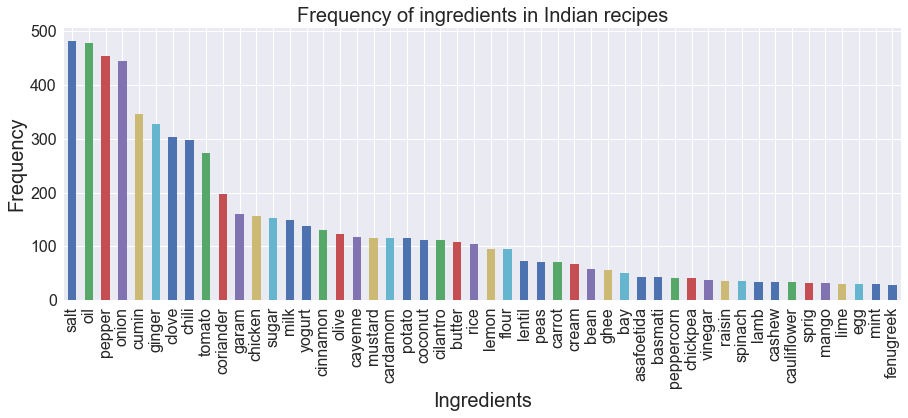

In [162]:
count[:50].plot(kind='bar', figsize=(15, 5), rot = 90, fontsize=16)

plt.xlabel('Ingredients', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency of ingredients in Indian recipes', size=20);